# Firm Heterogeneity and Entry-Exit (Khan-Thomas-Winberry, Clementi-Palazzo-AEJ)

# ToDo: Add hyperlink to the paper 

In [1]:
# Code Essentials
!pip install quantecon  >/dev/null
#Tauchen method is needed from quantecon to approximate the Markov Process

# ToDo: Don't use %matplotlib inline; instead write so that it will work when run from the command line, as done in BufferStockTheory -- see setup
%matplotlib notebook
import numpy as np
from quantecon.markov.approximation import tauchen
import scipy.optimize as opt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import quantecon
import scipy.interpolate as intpl
from matplotlib import cm
from numba import vectorize, jit, njit, float64, prange

I adopt the setup that I created in the Khan-Thomas-Winberry notebook. The two notebooks still do not have aggregate shocks build into them but I will sketch some results using this notebook. I analyze a simple version of Clementi and Palazzo's (2016) model of the firm lifecycle which itself builds on Hopenhyan (1992) and Hopenhayn and Rogerson (1993). Currently, this setup will solve the model without aggregate shocks.

We have **two** groups of firms. 

**Group 1**


The **first** group of \textit{incumbent firms} behave similarly to Khan and Thomas (2008) model except that they have convex costs of capital adjustment rather than fixed costs. To be specific, each of these incumbent firms has a decreasing returns to scale production fucnction $$y_{jt}=e^{\epsilon_{jt}}k_{jt}^{\theta}n_{jt}^\nu$$, where $y_{jt}$ is output, $\epsilon_{jt}$ is idiosyncratic productivity, $k_{jt}$ is the firm's capital stock, $n_{jt}$ is the firm's labor input, and $\theta+\nu < 1$.

The idiosyncratic productivity $\epsilon_{jt}$ follows a Markov Chain process. Firms accumulate capital according to the accumulation equation $$k_{jt+1}=(1-\delta)k_{jt}+i_{jt}$$.

Capital accumulation incurs the convex adjustment cost $$-\frac{\varphi}{2} (\frac {i_{jt}}{k_{jt}})^2 k_{jt}$$, in units of output. At the beginning of each period, incumbent firms must pay a fixed cost $c_{f}$ units of output to remain in operation. A firm that does not pay this fixed cost does not produce, sells its entire capital stock with value $(1-\delta)k$ and permanently exits the economy.


**Group 2**

There is a continuum of the second group of firms, the \textit{potential entrants}. These firms are ex-ante identical. At the beginning of each period, each firms decides whether to pay a fixed cost $c_{e}$ and enter the economy. If a potential entrant enters the economy, it draws a value for idiosyncratic productivity $\epsilon_{jt}$ from some distribution $\nu$ and begins as an incumbent firm with $k_{jt}=$0. We also assume that there are no adjustment costs at $k_{jt}=0$.

Further, we assume there is free entry among potential entrants, which implies that the exoected value from entering is less than or equal to the entry cost $c_{e}$, with equality if entry actually takes place. In equations, this condition is $c_{e} \leq \int v(\epsilon,0)\nu(d\epsilon)$, with equality if $m^{*} > 0$ (where $v(\epsilon,k)$ is the value function of an incumbent firm and $m^{*}$ is the mass of entrants in equilibrium.)


## Household##

Finally, there is a representative household with preferences over consumption $C_{t}$ and labor $N_{t}$ represented by the expected utility function

$$\mathrm E_{0} \sum_{t=0}^{\infty} \beta^{t}(log C_{t}- aN_{t})$$
where $\beta$ and $a$ are parameters. Output here is used for consumption, investment, capital adjustment costs, entry costs and operating costs. A steady state recursive competitive equilibrium of this economy is a set of incumbent value functions  $\nu(\epsilon,k)$. policy rules $k'(\epsilon,k)$ and $n(\epsilon,k)$, a mass of entrants per period $m^{*}$, a measure of active firms at the beginning of period $g^{*}(\epsilon,k)$ and real wage $w^{*}$ such that 

\begin{itemize}
\item Hello
\end{itemize}

\begin{itemize}
\item incumbent firms maximize their firm value;
\item the free entry condition holds;
\item the labor market clears;
\item the measure of active firms $g^{*}(\epsilon,k)$ is stationary.
\end{itemize}

More formally, let me define the recursive equilibirum now.

## Recursive Equilibrium

At the beginning of each period, incumbent firms must pay a fixed cost \( c_{f} \) units of output to remain in operation. A firm that does not pay this fixed cost permanently exits the economy immediately and sells its entire capital stock with value \( (1-\delta) k, \)
i.e. \( V_{x}(k)=(1-\delta) k \)​
​
Then, the start-of-period value of an incumbent firm is dictated by the function \( V(\lambda, k, s) \) which solves the following functional equation:
\[ V(\varepsilon, k)=\max \left\{V_{x}(k), \tilde{V}(\varepsilon, k)-c_{f}\right\} \] Given that firms accumulate capital according to the accumulation equation \( k_{j t+1}= \) \( (1-\delta) k_{j t}+i_{j t} \) and capital accumulation incurs the adjustment cost \( -\frac{\varphi}{2}\left(\frac{i_{jt} }{k_{j t}}\right)^{2} k_{j t} \), in units of output
The prospective value of an entrant is \[ V(\varepsilon, 0)=\max \left\{0, \tilde{V}(\varepsilon, 0)-c_{e}\right\} \] hence, she will invest and start operating if and only if \( c_{e} \leq \int V(\varepsilon, 0) d \varepsilon \)
For a given Markov process, a recursive competitive equilibrium consists of
(i) value functions \( V(\varepsilon, k), \bar{V}(\varepsilon, k) \) and \( V_{e}(\varepsilon, 0), \);
(ii) policy functions \( n(\varepsilon, k), k^{\prime}(\varepsilon, k), \);
(iii) bounded sequences of wages \( \left\{w_{t}\right\}_{t=0}^{\infty}, \) incumbents' measures \( \left\{g_{t}\right\}_{t=1}^{\infty}, \) and entrants' measures \( \left\{m_{t}\right\}_{t=0}^{\infty} \) such that, for all \( t \geq 0 \).

1. \( V(\varepsilon, k), \tilde{V}(\varepsilon, k), \) and \( n(\varepsilon, k) \) solve the incumbent's optimization problem;

2. \( V_{e}(\varepsilon, 0) \) and \( k^{\prime}(\lambda, 0) \) solve the entrant's optimization problem;

3. The representative houschold chooses consumption and labour such that \( \frac{w(g)}{C(g)}= \) \( \frac{a}{N(g)} \);

4. The labour market clears: \( N\left(w_{t}\right)=\int n\left(\varepsilon_{t}, k\right) g_{t}(\varepsilon, k) d \varepsilon d k \forall t \geq 0 \);

5. The goods market clears: \( C\left(g_{t}\right)=\int\left[y\left(\varepsilon_{t}, k\right)-i\left(\varepsilon_{t}, k\right)\right] g_{t}(\varepsilon, k) d \varepsilon d k: \forall t \geq 0 \).

In [3]:
# Need to put all of them in one class, 
# Workhorse model for Firm Heterogeneity, 
# Works well for Khan and Thomas (2008),Clementi and Palazzo (AEJ Macro 2016)
# Parameters set-up

theta = 0.21 #capital share
mu = 0.64 #labor share
delta = 0.1 #depreciation
beta = 0.96 #discount factor
varphi = 0.5 #convex cost adjustment parameter  
rho = 0.9  #Idiosyncratic process parameter
sigma = 0.02 # Standard dev. of idiosyncratic iid shocks
n_ss = 0.6 #labor supply steady state
cf = 0.01 #Incumbent's cost of operation
ce= 0.02 #entrant's cost of operation
N_k = 50 #Tauchen grid size
N_eps = 10 
m=3 #Eps grid initializer

### Representative Agent Steady State

We begin by analysing the steady state equilibrium of the model in which there is a representative firm and productivity is equal to the mean value of \( \varepsilon \). In this scenario, the steady state recursive competitive equilibrium is characterized by a set \( V^{*}(\bar{\varepsilon}, k), C^{*}, N^{*}, w^{*} \) and \( g(\bar{\varepsilon}, k)^{*} \) such that
1. \( V^{*}(\bar{\varepsilon}, k) \) solves the representative firm's optimization problem (i.e. Bellman eq.);
2. Taking \( N^{*} \) as given, the representative household's optimization is satisfied by \( \frac{w^{*}}{C^{*}}=\frac{a}{N^{*}} \)
3. Labour market clearing follows from \( N^{*}\left(w_{t}\right)=\int n(\bar{\varepsilon}, k) g(\bar{\varepsilon}, k) d k \forall t \geq 0 \)
4. The goods market satisfies \( C^{*}=\int[y(\bar{\varepsilon}, k)-i(\bar{\varepsilon}, k)] g(\bar{\varepsilon}, k) d k \forall t \geq 0 \)

Now, assume that steady state labour supply is \( N_{r e p}^{*}=0.6 . \) Then, we can use the following system of equations to solve for \( K_{r e p}^{*} \) and \( w_{r e p}^{*}=0.6 . \) Then, we can use the \[ \bar{n}=0.6 \]
\( \bar{r}=\frac{1}{\beta}-(1-\delta) \)
\( \bar{k}=\frac{1}{\beta}-(1-\delta) \)
\( \bar{k}=\delta \bar{k} \)
\( \bar{i}=\nu \bar{k} \)
\( \bar{w}=\nu \bar{k}^{\theta} \bar{n}^{\nu-1} \)
\( \bar{c}=\bar{k}^{\theta} \bar{n}^{\nu}-\bar{i} \)
\( \bar{a}=\frac{w^{*} n^{*}}{c^{*}} \)

In particular, \( K_{r e p}^{*}=1.09 \) and \( w_{r e p}^{*}=0.78 . \)

In [4]:
def get_ss():
    
    r = (1 / beta) - (1 - delta)
    n = n_ss
    eps = 0
    k = (r / ((n ** mu) * theta * np.exp(eps))) ** (1 / (theta - 1))
    y = np.exp(eps) * (k ** theta) * (n ** mu)
    i = delta * k
    c = y - i
    w = mu * y / n
    a = w / c
    
    return k, w 

In [5]:
k_ss, w_ss = get_ss()
print(k_ss)
print(w_ss)

1.0881001887382777
0.7829715643830996


###  Incumbent Firms' Decision Rule (Tauchen's method first usage)

In [6]:
### k_grid
k_low =  k_ss - 0.5
k_high = k_ss + 0.5
k_grid = np.linspace(k_low, k_high, N_k)

### eps_grid using Tauchen
## https://lectures.quantecon.org/jl/finite_markov.html

trans_eps_MC = tauchen(rho, sigma, n=N_eps).P

sigma_y = np.sqrt( sigma ** 2 / (1 - rho ** 2) )
eps_grid = np.zeros(N_eps)
eps_grid[0] = -m * sigma_y
eps_grid[N_eps-1] = m * sigma_y
s = (eps_grid[N_eps-1] - eps_grid[0]) / (N_eps - 1)
for i in range(1, N_eps-1):
    eps_grid[i] = eps_grid[i-1] + s
    

# Now we initialize the value function:
V_init = np.zeros((N_eps, N_k))

In [7]:
k_low

0.5881001887382777

In [8]:
k_high

1.5881001887382777

In [9]:
trans_eps_MC

array([[5.30478170e-01, 4.15375002e-01, 5.32885772e-02, 8.56706028e-04,
        1.54439460e-06, 2.92857183e-10, 5.66213743e-15, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.67966302e-02, 4.93930466e-01, 3.69971746e-01, 3.87971726e-02,
        5.03259844e-04, 7.25892202e-07, 1.09655174e-10, 1.66533454e-15,
        0.00000000e+00, 0.00000000e+00],
       [3.71959075e-03, 1.21954964e-01, 5.23228103e-01, 3.23146274e-01,
        2.76615366e-02, 2.89198006e-04, 3.33562232e-07, 4.01295663e-11,
        4.44089210e-16, 0.00000000e+00],
       [2.52812798e-05, 5.78316444e-03, 1.54270165e-01, 5.43701344e-01,
        2.76746317e-01, 1.93110204e-02, 1.62557651e-04, 1.49849563e-07,
        1.43532963e-11, 1.11022302e-16],
       [2.82551739e-08, 4.80546862e-05, 8.83083400e-03, 1.91241547e-01,
        5.54230974e-01, 2.32360418e-01, 1.31987073e-02, 8.93711456e-05,
        6.58100220e-08, 5.01743092e-12],
       [5.01748193e-12, 6.58100220e-08, 8.93711456e-05, 1.31987073e-02,
   

In [10]:
eps_grid

array([-0.13764944, -0.10706068, -0.07647191, -0.04588315, -0.01529438,
        0.01529438,  0.04588315,  0.07647191,  0.10706068,  0.13764944])

In [11]:
n = lambda eps, k: (w / (mu * np.exp(eps) * k ** theta)) ** (1 / (mu - 1)) #closed form solution for n

In [12]:
w = w_ss

In [13]:
n,w

(<function __main__.<lambda>(eps, k)>, 0.7829715643830996)

### Value Function Iteration (with interpolation) , plotting the value function with indicator for continuation

In [14]:
def vf_update(eps_index, k_index, V_old_interp, w, cf):
    """
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function. V_old[i] approximates V(k_grid[i]).
    
    output:
    action_value: value of all possible state-action pairs.
    """
    
    ### solve v1
    eps = eps_grid[eps_index]
    k = k_grid[k_index]

    n = (w / (mu*np.exp(eps)*k**theta))**(1/(mu-1))
    action_value = np.zeros((N_k, N_eps))
    
    
    profit = np.exp(eps) * (k ** theta) * (n ** mu) - w * n - (k_grid - (1 - delta) * k) \
        - varphi / 2 * (k_grid / k - (1 - delta)) ** 2 * k 
    
    
    action_value = profit + beta * np.dot((trans_eps_MC[eps_index, :]).T, V_old_interp(eps_grid, k_grid).T)
    
    V1_new = np.max(action_value)
    
    ### solve v_new
    V_new = max((1 - delta) * k, V1_new - cf)
    
    return V_new, action_value

In [15]:
def vf_update_iteration(V_old, V_old_interp, w, cf):
    """
    input: 
    V_old: array with current approximation of the value function
    
    output:
    V_new: updated approximation of the value function
    """
    V_new = np.zeros_like(V_old)
    
    for i in range(N_eps):
        for j in range(N_k):
            V_new[i, j], action_value = vf_update(i, j, V_old_interp, w, cf)

    return V_new

In [16]:
def solve_value_func_iter(w, cf, plot=True):
    difference_list = []
    threshold = 1e-10
    max_iterations = 10000
    plot_interval = 50

    V = V_init.copy()

    for iteration in range(max_iterations):
        
        # x.size = m and y.size = n, if z.ndim == 2, then z must have shape (n, m)
        V_interp = intpl.interp2d(eps_grid, k_grid, V.T, kind='linear')
        V_new = vf_update_iteration(V, V_interp, w, cf)
        #V_new = vf_update_iteration(V, V_interp, w, cf)
        
        
        difference = np.amax(abs(V_new - V))
        # print('Iteration: {}, difference: {}'.format(iteration + 1, difference))

        difference_list.append(difference) 

        V = V_new

        if difference < threshold:
            #print('Converged after iteration {}'.format(iteration + 1))
            #print('Iteration: {}, difference: {}'.format(iteration + 1, difference))
            
            if plot:
                fig = plt.figure()
                ax = fig.gca(projection='3d')
                EPS, K = np.meshgrid(eps_grid, k_grid)
                surf1 = ax.scatter(EPS, K, V.T, cmap=cm.autumn)
                surf2 = ax.plot_surface(EPS, K, (1 - delta) * K)
                #fig.colorbar(surf1, shrink=.5, aspect=5)
                ax.set_xlabel(r'$\epsilon$')
                ax.set_ylabel(r'$k$')
                ax.set_zlabel(r'V')
                ax.set_title("Value Function")
                #plt.show()
                #plt.close()
                    
            break
   
    return V, V_interp
 

### Value Function Plot

In [17]:
V, V_interp = solve_value_func_iter(w_ss, cf) # as dependent on steady state wage, incumbent cost.

<IPython.core.display.Javascript object>

### Policy Function 

In [18]:
def extract_policy(V, V_interp, w, plot=True):

    poly_grid = np.zeros_like(V)
        
    for i in range(N_eps):
        for j in range(N_k):
            V_new, action_value = vf_update(i, j, V_interp, w, cf)
            
            if V_new == (1 - delta) * k_grid[j]:
                poly_grid[i, j] = 0
            
            else:
                poly_grid[i, j] = k_grid[np.argmax(action_value)]
        
    if plot:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        EPS, K = np.meshgrid(eps_grid, k_grid)
        #surf1 = ax.plot_surface(EPS, K, poly_grid.T, cmap=cm.autumn)
        surf1 = ax.scatter(EPS, K, poly_grid.T, cmap=cm.autumn)
        #fig.colorbar(surf1, shrink=.5, aspect=5)
        #surf1 = ax.plot_wireframe(EPS, K, V.T)
        ax.set_xlabel(r'$\epsilon$')
        ax.set_ylabel(r'$k$')
        ax.set_zlabel(r"$k'$")
        ax.set_title("Capital Accumulation Policy Function")
        
    return poly_grid

### Policy Function Plot (Heterogeneity creeping in already)

In [ ]:
poly_grid = extract_policy(V, V_interp, w)

In [20]:
#poly_grid

### Indicator for whether firm will continue

In [21]:
def firm_continue(eps, k, V_interp):
    V_val = V_interp(eps, k)
    if V_val == (1 - delta) * k:
        return False
    else:
        return True

In [22]:
firm_continue(0, 5, V_interp) # for different shock realizations

True

In [23]:
firm_continue(0.01, 1, V_interp)

True

In [24]:
def firm_continue_grid(V):
    V_new = np.zeros_like(V)
    for i in range(N_k):
        V_new[:, i] = ((1 - delta) * k_grid[i] != V[:, i]) 
    return V_new

In [25]:
firm_cont_grid = firm_continue_grid(V)

### Function $\hat{V}(\epsilon)$

In [26]:
def get_v_hat(eps, V_interp):
    
    eps_index = np.where(eps_grid == eps)[0][0]
    vals = []
    
    for k_index in range(N_k):
        val = - k_grid[k_index] + beta * np.dot(trans_eps_MC[eps_index, :], V_interp(eps_grid, k_grid[k_index]))
        vals.append(val)
    
    return max(vals)       

In [27]:
get_v_hat(eps_grid[4], V_interp)

2.3570456138244444

## Market-Clearing Wage (with entry)

Here, the free-entry condition must hold with equality, i.e. $c_{e}=\int \hat{v(\epsilon)} \nu (d\epsilon) $. We will go for root casting where we solve the equation for w*.

In [28]:
### https://dilawarnotes.wordpress.com/2017/11/07/stationary-distribution-of-markov-chains-using-python/
def solveStationary( A ):
    n = A.shape[0]
    a = np.eye( n ) - A
    a = np.vstack( (a.T, np.ones( n )) )
    b = np.matrix( [0] * n + [ 1 ] ).T
    return np.linalg.lstsq( a, b )[0]

#### Stationary Distribution of $\epsilon$

In [29]:
stationary_dist_eps = np.array(solveStationary(trans_eps_MC))
stationary_dist_eps

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([[0.00575924],
       [0.02496288],
       [0.07627247],
       [0.16041558],
       [0.23258983],
       [0.23258983],
       [0.16041558],
       [0.07627247],
       [0.02496288],
       [0.00575924]])

In [30]:
np.sum(stationary_dist_eps)

0.9999999999999999

### Solving for Market-Clearing Wage

In [31]:
def mark_wage_err(w, ce, cf):
    V_new, V_interp_new = solve_value_func_iter(w, cf, plot=False)
    
    V_hats = np.zeros_like(eps_grid)
    # iterate loop in parallel
    
    for i in range(len(eps_grid)):
        V_hats[i] = get_v_hat(eps_grid[i], V_interp_new)
    
    integral = np.dot(V_hats, stationary_dist_eps)
    err = ce - integral
    #print(err)
    return np.array(err)

In [32]:
def solve_mark_wage(w_guess, ce, cf):
    args = (ce, cf)
    result = opt.root(mark_wage_err, w_guess, args = args)
    return result.x[0]

In [33]:
w_star = solve_mark_wage(0.9, 0.02, 0.01)

In [34]:
w_star

1.1477168978636108

It could very well be the case that there might not be a solution to the above system of equations. In that case, my presumption is that the entry costs are so high that firms will never find it profitable to enter the economy.

Stationary measure of firms and mass of entrants

In [35]:
V, V_interp = solve_value_func_iter(w_star, cf)

<IPython.core.display.Javascript object>

In [36]:
poly_grid = extract_policy(V, V_interp, w_star)

<IPython.core.display.Javascript object>

In [37]:
firm_cont_grid = firm_continue_grid(V)
#firm_cont_grid

### Step 1: Solving $g(\epsilon, k)$

In [38]:
g_init = np.random.uniform(low=0, high=1, size=(N_eps, N_k))
g_init = g_init / np.sum(g_init)
g = g_init.copy()
m_star = 1

In [39]:
np.sum(g)

0.9999999999999998

In [40]:
@jit(nopython=True, parallel=True)
def update_g(g):
    g_new = np.zeros((N_eps, N_k))
    
    # iterate loop in parallel
    for k in range(N_eps):
        for l in range(N_k):
            C = (poly_grid == k_grid[l])
            
            summation = 0
            for i in range(N_eps):
                for j in range(N_k):
                    
                    sum_ij = trans_eps_MC[i,k] * C[i, j] * firm_cont_grid[i, j] * g[i, j] 
                    summation += sum_ij
                    
            summation += m_star * stationary_dist_eps[k][0]
            g_new[k, l] = summation
     
    return g_new

In [41]:
def solve_g(plot=True):
    threshold = 1e-8
    max_iterations = 1000
    diff = 1
    g = g_init.copy()
    
    while (diff > 1e-5):
        g_new = update_g(g) 
        #print('sum :', np.sum(g_new))
        diff = np.max(np.abs(g_new - g))
        #print(diff)
        g = g_new.copy()
    
    g_normalized = g_new / np.sum(g_new)
        
    if plot:
        
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        EPS, K = np.meshgrid(eps_grid, k_grid)
        surf1 = ax.scatter(EPS, K, g_normalized.T, cmap=cm.autumn)
        #fig.colorbar(surf1, shrink=.5, aspect=5)
        #surf1 = ax.plot_wireframe(EPS, K, g_normalized.T)
        ax.set_xlabel(r'$\epsilon$')
        ax.set_ylabel(r'$k$')
        ax.set_zlabel(r"$g$")
        ax.set_title("Law of Motion g")
        
    return g_normalized

In [42]:
g = solve_g()

<IPython.core.display.Javascript object>

### Step 2: Solving m*

In [43]:
def get_g_star(g, m):
    return g.copy() * m

In [44]:
def n(eps, k, w):
    n = (w / (mu * np.exp(eps) * k **theta)) ** (1/(mu - 1))
    return n

In [45]:
def agg_l_d(g_star, w_star):
    
    n_d = 0
    for i in range(N_eps):
        for j in range(N_k):
            n_d += n(eps_grid[i], k_grid[j], w_star) * g_star[i, j]
    return n_d

In [46]:
def m_error(m_guess, *args):
    
    g, w_star = args
    g_star = get_g_star(g, m_guess)
    n_d = agg_l_d(g_star, w_star)
    m_error = n_d - 0.6
    return m_error

In [47]:
def solve_m(m_guess, g, w_star):
    
    args = (g, w_star)
    result = opt.root(m_error, m_guess, args=args)
    return result.x[0]

In [48]:
m_guess = 0.5
m_star = solve_m(m_guess, g, w_star)
m_star

3.881600472900719

### Step 3: Solving value of a

In [49]:
def get_agg_Y():
    
    agg_Y = 0
    for i in range(N_eps):
        for j in range(N_k):
            agg_Y += ( np.exp(eps_grid[i]) * k_grid[i] ** theta * n(eps_grid[i], k_grid[j], w_star) ) * g[i, j]
    
    return agg_Y

In [50]:
get_agg_Y()

0.14634544929464183

In [51]:
def get_agg_I():
    
    agg_I = 0
    for i in range(N_eps):
        for j in range(N_k):
            agg_I += ( poly_grid[i, j] - (1 - delta) * k_grid[j] ) * g[i, j]
            
    return agg_I

In [52]:
get_agg_I()

0.03602639989420653

In [53]:
def get_agg_C():
    
    Y = get_agg_Y()
    I = get_agg_I()
    C = Y - I
    return C

In [54]:
get_agg_C()

0.1103190494004353

In [55]:
def get_a():
    
    C = get_agg_C()
    a = C * w_star
    
    return a

In [56]:
get_a()

0.12661503715313002

## Calibrate the entry and exit costs

### (i) Calibrating entry cost: Calibrate to target annual exit rate of 10%.

In [57]:
def calibrate_cf():
    
    cf_range = [0.01, 0.013, 0.014, 0.015, 0.016]
    error = 1000
    cal_cf = 0
    iteration = 1
    for cf_val in cf_range:
        
        print("iteration ", iteration)
        print("cf val: ", cf_val)
        V, V_interp = solve_value_func_iter(w_star, cf_val, plot=True)
        
        frac_exit_sum = 0
        for i in range(N_k):
            V_i = V[:, i]
            exit_val = (1 - delta) * k_grid[i]
            exit_bool = (V_i == exit_val)
            
            frac_exit_i = exit_bool * g[:, i]
            frac_exit_sum += frac_exit_i.sum()
        
        print("Fraction of exiting firms:", frac_exit_sum)  
        print("\n")
        new_error = abs(frac_exit_sum - 0.1)
        #print(new_error)
            
        if new_error < error:
            error = new_error
            cal_cf = cf_val
                
        iteration += 1
                
    return cal_cf, error 

In [58]:
cal_cf, error = calibrate_cf()

iteration  1
cf val:  0.01


<IPython.core.display.Javascript object>

Fraction of exiting firms: 0.022483086312923787


iteration  2
cf val:  0.013


<IPython.core.display.Javascript object>

Fraction of exiting firms: 0.1325297053078623


iteration  3
cf val:  0.014


<IPython.core.display.Javascript object>

Fraction of exiting firms: 0.13406633900176393


iteration  4
cf val:  0.015


<IPython.core.display.Javascript object>

Fraction of exiting firms: 0.13607604497514839


iteration  5
cf val:  0.016


<IPython.core.display.Javascript object>

Fraction of exiting firms: 0.13906643107358563




In [59]:
cal_cf 

0.013

### (ii) Calibrating exit costs: Calibrate to target average size of new firms to be 40% of average size of all firms

In [60]:
def calibrate_ce():
    
    ce_range = [0.01, 0.05, 0.1, 0.2, 0.5]
    error = 1000
    cal_ce = 0
    iteration = 1
    for ce_val in ce_range:
        
        #print("iteration ", iteration)
        #print("ce val: ", ce_val)
        
        w_guess = 0.9
        w_star = solve_mark_wage(w_guess, ce, cal_cf)
        #print("w_star:", w_star)
        m_guess = 0.05
        m_star = solve_m(m_guess, g, w_star)
        #print("m_star :", m_star)
        
        new_error = abs(m_star - 0.4)
        if new_error < error:
            error = new_error
            cal_ce = ce_val
        
        iteration += 1
    
    return cal_ce, error

In [ ]:
cal_ce, error = calibrate_ce()

In [ ]:
cal_ce 

## Plotting Investment rates
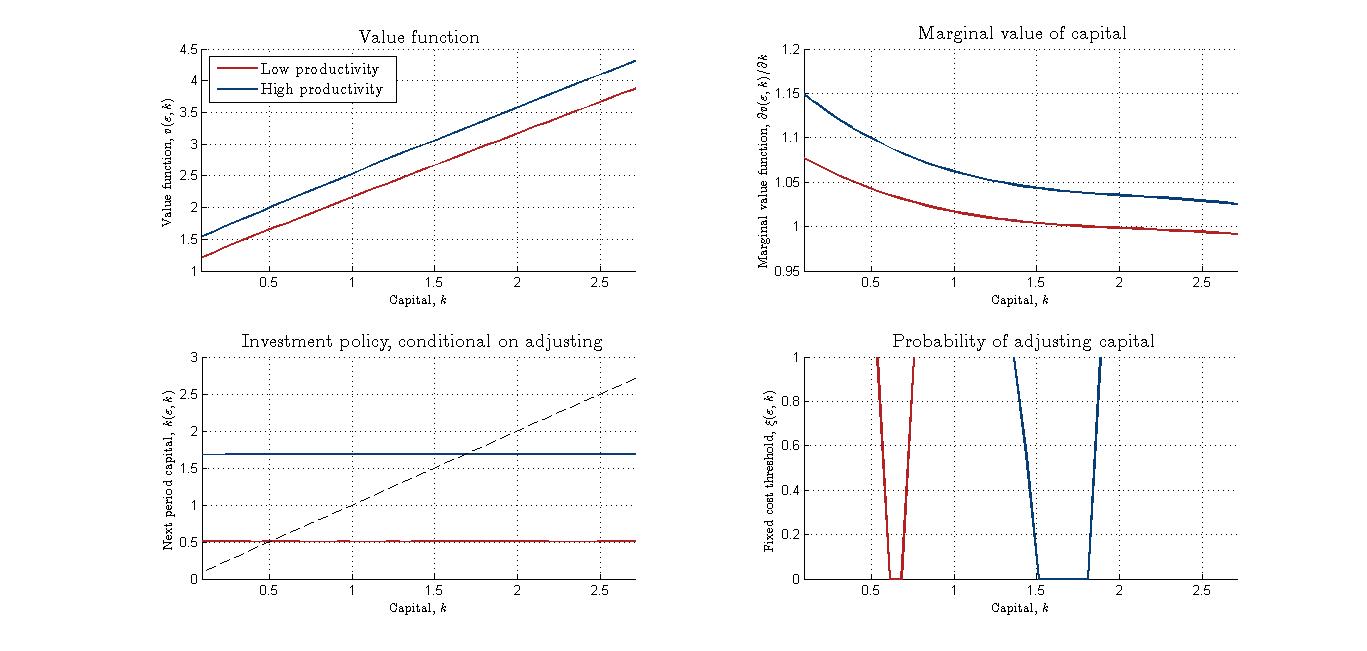
Solution accompanied in the matlab file.